In [1]:
import cv2
import matplotlib.pyplot as plt

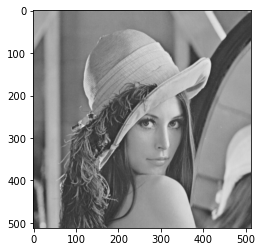

In [2]:
img = cv2.imread('F:/ACADEMIC/lena.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

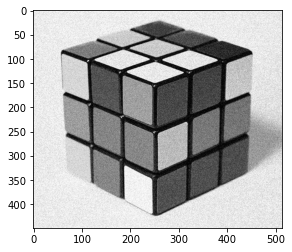

In [3]:
img2 = cv2.imread('F:/ACADEMIC/rubiks_cube.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [67]:
import numpy as np

def Convolution(image, kernel):
    im_height, im_width = image.shape
    result = np.zeros((im_height, im_width), dtype="float32")
    
    n = kernel.shape[0]
    pad = n//2
    for x in range(pad, im_height-pad):
      for y in range(pad, im_width-pad):
        img_crop = image[x-pad:x+pad+1, y-pad:y+pad+1]
        imf_crop = img_crop[::-1,::-1]
        #print(img_crop)
        result[x][y] = np.sum(img_crop*kernel)
        
    return result

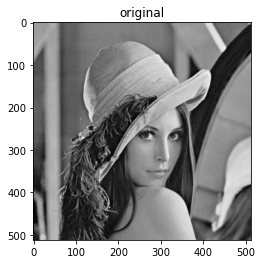

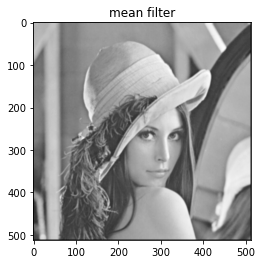

In [70]:
""""
Mean Filter
"""
kernel = np.array(([1/9, 1/9, 1/9],
                [1/9, 1/9, 1/9],
                [1/9, 1/9, 1/9]), np.float32)

#imgg = np.array([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]])


result = Convolution(img, kernel)
plt.title('original')
plt.imshow(img, cmap='gray')
plt.show()
plt.title('mean filter')
plt.imshow(result, cmap='gray')
plt.show()

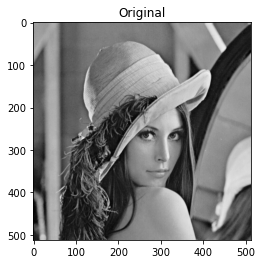

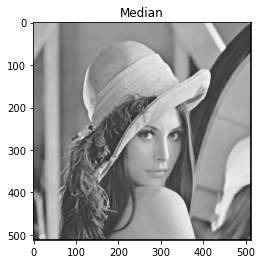

In [46]:
"""
Median Filter
"""
height, width = img.shape
filter_size = 3
median_result = np.zeros((height, width), dtype='float32')

for x in range(height-2):
    for y in range(width-2):
        arr_list = list()
        arr_list.append(img[x:x+filter_size, y:y+filter_size])
        arr_list = np.array(arr_list)
        arr_list = arr_list.flatten()
        arr_list.sort()
        median_result[x][y] = arr_list[len(arr_list)//2]

plt.title('Original')
plt.imshow(img, cmap='gray')
plt.show()
        
plt.title('Median')
plt.imshow(median_result, cmap='gray')
plt.show()

514 514


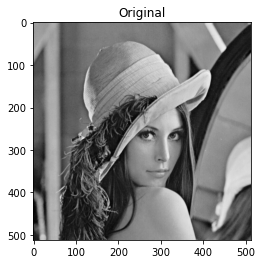

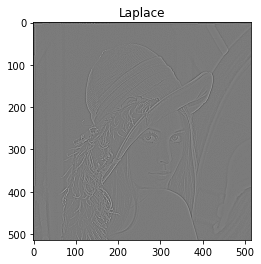

In [57]:
"""Laplace"""
height, width = img.shape
kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplace_img = np.zeros((height, width))
laplace_img = Convolution(img, kernel)

plt.title("Original")
plt.imshow(img, cmap='gray')
plt.show()
plt.title("Laplace")
plt.imshow(laplace_img, cmap='gray')
plt.show()

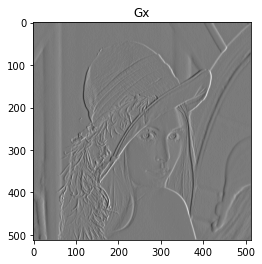

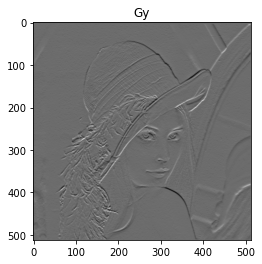

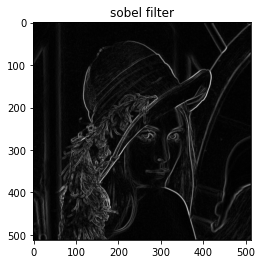

In [75]:
"""Sobel"""

height, width = img.shape
horizontal_mask = np.array([[1, 0, -1], 
                            [2, 0, -2], 
                            [1, 0, -1]])
vertical_mask = np.array([[1, 2, 1], 
                          [0, 0, 0], 
                          [-1, -2, -1]])

st = horizontal_mask.shape[0]//2
ed = horizontal_mask.shape[1]//2
Gx = np.zeros((height, width))
Gy = np.zeros((height, width))

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gx[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * horizontal_mask)

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gy[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * vertical_mask)

G = np.sqrt(Gx**2 + Gy**2)

plt.title('Gx')
plt.imshow(Gx, cmap='gray')
plt.show()

plt.title('Gy')
plt.imshow(Gy, cmap='gray')
plt.show()

plt.title('sobel filter')
plt.imshow(G, cmap='gray')

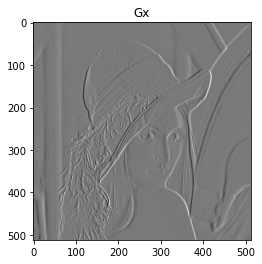

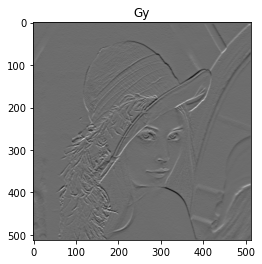

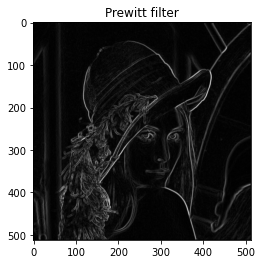

In [77]:
"""Prewitt"""
height, width = img.shape
horizontal_mask = np.array([[1, 0, -1], 
                            [1, 0, -1], 
                            [1, 0, -1]])
vertical_mask = np.array([[1, 1, 1], 
                          [0, 0, 0], 
                          [-1, -1, -1]])
st = horizontal_mask.shape[0]//2
ed = horizontal_mask.shape[1]//2
Gx = np.zeros((height, width))
Gy = np.zeros((height, width))

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gx[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * horizontal_mask)

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gy[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * vertical_mask)

G = np.sqrt(Gx**2 + Gy**2)

plt.title('Gx')
plt.imshow(Gx, cmap='gray')
plt.show()

plt.title('Gy')
plt.imshow(Gy, cmap='gray')
plt.show()

plt.title('Prewitt filter')
plt.imshow(G, cmap='gray')

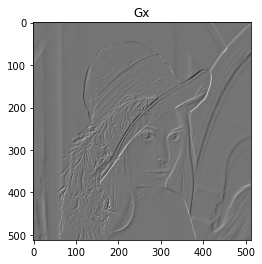

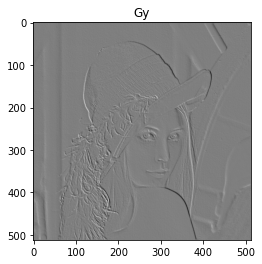

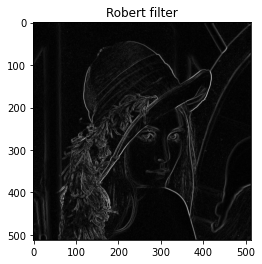

In [81]:
"""Robert"""
height, width = img.shape

horizontal_mask = np.array([[1, 0], [0, -1]])
vertical_mask = np.array([[0, 1], [-1, 0]])

st = horizontal_mask.shape[0]//2
ed = horizontal_mask.shape[1]//2
Gx = np.zeros((height, width))
Gy = np.zeros((height, width))

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gx[row, col] = np.sum(img[row-st:row+st, col-ed:col+ed] * horizontal_mask)

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gy[row, col] = np.sum(img[row-st:row+st, col-ed:col+ed] * vertical_mask)

G = np.sqrt(Gx**2 + Gy**2)

plt.title('Gx')
plt.imshow(Gx, cmap='gray')
plt.show()

plt.title('Gy')
plt.imshow(Gy, cmap='gray')
plt.show()

plt.title('Robert filter')
plt.imshow(G, cmap='gray')

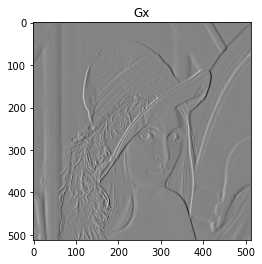

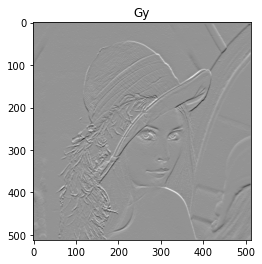

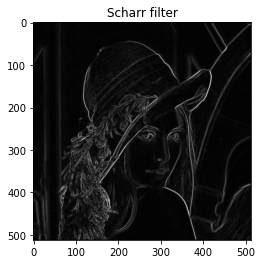

In [86]:
"""Scharr"""
height, width = img.shape

horizontal_mask = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, +3]])
vertical_mask = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])

st = horizontal_mask.shape[0]//2
ed = horizontal_mask.shape[1]//2
Gx = np.zeros((height, width))
Gy = np.zeros((height, width))

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gx[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * horizontal_mask)

for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gy[row, col] = np.sum(img[row-st:row+st+1, col-ed:col+ed+1] * vertical_mask)

G = np.sqrt(Gx**2 + Gy**2)

plt.title('Gx')
plt.imshow(Gx, cmap='gray')
plt.show()

plt.title('Gy')
plt.imshow(Gy, cmap='gray')
plt.show()

plt.title('Scharr filter')
plt.imshow(G, cmap='gray')

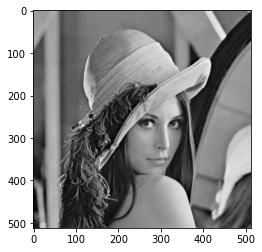

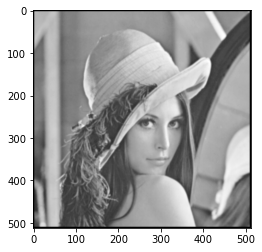

In [85]:
height, width = img.shape
kernel_size = 7
sigma = (kernel_size - 1) // 6
kernel = np.zeros((kernel_size, kernel_size))
st = kernel.shape[0]//2
ed = kernel.shape[1]//2

import math
def gaussian_filter(x, y, sigma):
  PI = math.pi
  return (1/(2*PI*sigma**2))*math.exp(-(x**2+y**2)/(2*sigma**2))

for i in range(-st, st+1):
  for j in range(-ed, ed+1):
    kernel[i+st][j+ed] = gaussian_filter(i, j, sigma)

gaussian_img = np.zeros((height, width))

for row in range(st, height-st):
  for col in range(ed, width-ed):
    img_portion = img[row-st:row+st+1, col-ed:col+ed+1]
    img_portion = img_portion[::-1, ::-1]
    gaussian_img[row][col] = np.sum(img_portion*kernel)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(gaussian_img, cmap='gray')